In [1]:
#importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.optimizers  import adam
from keras.callbacks import Callback

from keras.utils import np_utils
from keras.datasets import cifar10

from keras.models import Sequential 
from keras.layers import Dense,Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


In [2]:
#loading the data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [3]:
# to know the type of data
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#take the first image look forom training data
x_train[0]

array([[[ 59.,  62.,  63.],
        [ 43.,  46.,  45.],
        [ 50.,  48.,  43.],
        ...,
        [158., 132., 108.],
        [152., 125., 102.],
        [148., 124., 103.]],

       [[ 16.,  20.,  20.],
        [  0.,   0.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [123.,  88.,  55.],
        [119.,  83.,  50.],
        [122.,  87.,  57.]],

       [[ 25.,  24.,  21.],
        [ 16.,   7.,   0.],
        [ 49.,  27.,   8.],
        ...,
        [118.,  84.,  50.],
        [120.,  84.,  50.],
        [109.,  73.,  42.]],

       ...,

       [[208., 170.,  96.],
        [201., 153.,  34.],
        [198., 161.,  26.],
        ...,
        [160., 133.,  70.],
        [ 56.,  31.,   7.],
        [ 53.,  34.,  20.]],

       [[180., 139.,  96.],
        [173., 123.,  42.],
        [186., 144.,  30.],
        ...,
        [184., 148.,  94.],
        [ 97.,  62.,  34.],
        [ 83.,  53.,  34.]],

       [[177., 144., 116.],
        [168., 129.,  94.],
        [179., 1

In [5]:
x_train= x_train/255
x_test = x_test/255

In [6]:
#normalize the pixel in the image -> 0 and 1
nClasses = 10
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)

In [7]:
#to know thw shape 
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 10)
x_test: (10000, 32, 32, 3)
y_test: (10000, 10)


In [8]:
#creating the model
def createModel():
    model =Sequential()
    model.add(Conv2D(32, (3 ,3),padding = 'same',activation = 'relu',input_shape = (32,32,3)))
    model.add(Conv2D(32, (3, 3) ,activation = 'relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64, (3, 3), padding = 'same',activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64, (3, 3), padding = 'same',activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))
    
    
    return model
    

In [9]:
model = createModel()

In [10]:
AdamOpt = adam(lr=0.001)                                                    #compile the model 
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()                      #summerize the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [12]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={} ):
        if(epoch % 5 == 0):
            print("just finished",epoch)
            print('--------------------------')                        #just a funtion to show to accuracy after 5 epochs
            print('losss = ',logs.get('val_loss'))
            print('accuracy :',logs.get('accuracy'))
            print('val_acc = ',logs.get('val_accuracy'))
            return    

In [13]:
batch_size = 256
epochs = 50                                           #fit the model with thw datasets
cc=CustomCallback()
hist = model.fit(x_train,y_train,batch_size =batch_size ,epochs =epochs,verbose=0,validation_data=(x_test, y_test),callbacks=[cc])

just finished 0
--------------------------
losss =  1.6270964761734008
accuracy : 0.25632
val_acc =  0.39149999618530273
just finished 5
--------------------------
losss =  0.947955504989624
accuracy : 0.61084
val_acc =  0.6586999893188477
just finished 10
--------------------------
losss =  0.8832559806823731
accuracy : 0.68718
val_acc =  0.6919999718666077
just finished 15
--------------------------
losss =  0.7160842308044434
accuracy : 0.72492
val_acc =  0.7531999945640564
just finished 20
--------------------------
losss =  0.6455068515777588
accuracy : 0.7469
val_acc =  0.7760000228881836
just finished 25
--------------------------
losss =  0.6559404342651367
accuracy : 0.75948
val_acc =  0.7720000147819519
just finished 30
--------------------------
losss =  0.5810254337310791
accuracy : 0.77296
val_acc =  0.7986000180244446
just finished 35
--------------------------
losss =  0.6379627890586853
accuracy : 0.78156
val_acc =  0.7833999991416931
just finished 40
------------------

Text(0.5, 1.0, 'Accuracy curve')

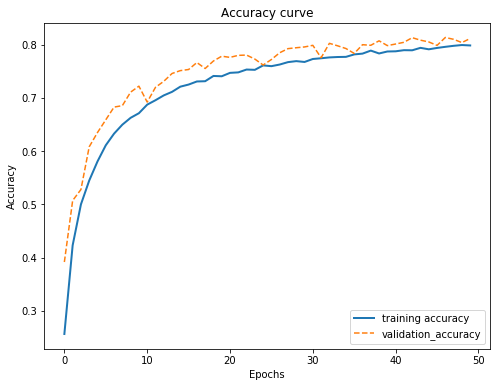

In [14]:
plt.figure(figsize=[8,6])
plt.plot(hist.history['accuracy'],linewidth=2.0)
plt.plot(hist.history['val_accuracy'],ls = '--')
plt.legend(['training accuracy','validation_accuracy'],fontsize=10,loc='lower right')          #Accuracy curve
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve')

Text(0.5, 1.0, 'Loss curve')

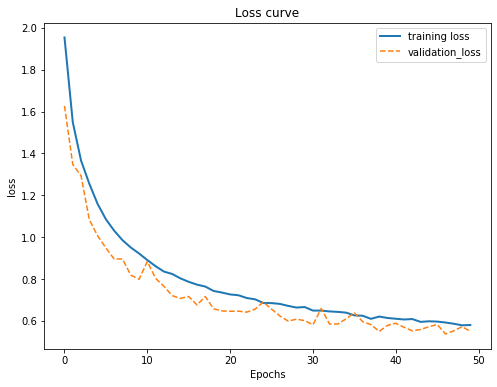

In [15]:
plt.figure(figsize=[8,6])
plt.plot(hist.history['loss'],linewidth=2.0)
plt.plot(hist.history['val_loss'],ls = '--')
plt.legend(['training loss','validation_loss'],fontsize=10,loc='upper right')                                #loss curve
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss curve')

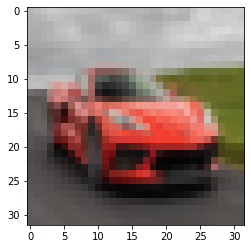

In [23]:
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize                        #load a new image for testing
imgg= imread('car.jpg')
Image_resize = resize(imgg,(32,32))
img = plt.imshow(Image_resize)

In [24]:
#get the prob
import numpy as np
probabilities = model.predict(np.array([Image_resize]))
probabilities

array([[2.3836348e-05, 9.9121886e-01, 9.1127034e-10, 2.0883958e-08,
        3.5939123e-11, 5.3326765e-10, 3.2828581e-08, 4.1646242e-11,
        8.6379732e-04, 7.8934953e-03]], dtype=float32)

In [26]:
# import numpy as np
number_of_class = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_of_class[index[9]])

Most likely class: Automobile


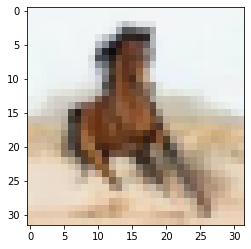

In [28]:
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize                        #load a new image for testing
imgg= imread('horse.jpg')
Image_resize = resize(imgg,(32,32))
img = plt.imshow(Image_resize)

In [29]:
#get the prob
import numpy as np
probabilities = model.predict(np.array([Image_resize]))
probabilities

array([[5.0316369e-03, 3.7470788e-06, 5.1681466e-02, 9.8998491e-03,
        4.1827927e-03, 2.8345399e-02, 1.5407134e-04, 9.0056151e-01,
        4.4335720e-06, 1.3517236e-04]], dtype=float32)

In [30]:
# import numpy as np
number_of_class = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_of_class[index[9]])

Most likely class: Horse


In [27]:
model.save('cnn_cifar10.hs')                     #save the model